# css polygons from matrices

[jump to the demo](#wxyz)

generate an image from text to extract the contours of the letters.

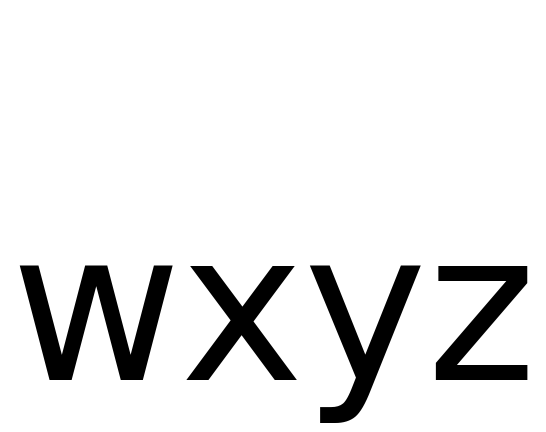

In [1]:
import matplotlib.pyplot as plot
import matplotlib, skimage, skimage.measure
from nbconvert_a11y.ttt import format_frame, new

figure = plot.gcf()
ax = plot.gca()
ax.axis("off")
plot.text(0, 0 , "wxyz", fontsize=150)
figure.savefig(image := io.BytesIO())
matrix = pipe(image, skimage.io.imread, (lambda x: x[:, :, :3]), skimage.color.rgb2gray)

In [2]:
contours = Series(skimage.measure.find_contours(matrix)).to_frame("contour")
contours.contour = contours.contour.apply(
    compose_left(
        numpy.round, operator.methodcaller("astype", int),
        DataFrame, DataFrame.drop_duplicates, operator.attrgetter("values")
    )
)
shift = contours.contour.apply(
    lambda x: Series(dict(zip("xy", x.min(0))))
)
shift_min = shift.min()
shift_min.iloc[1] += 20
contours.contour = contours.contour.apply(
    lambda x: x -  shift_min.values
)

In [3]:
wxyz = Series(["wxyz " * 1000] * len(contours))

compose css styles from the contours in the dataframe.

In [4]:
contours["polygon"] = contours.apply(
    compose_left(
        operator.attrgetter("contour"),
        map(reversed), map(tuple), map("%ipx %ipx".__mod__), 
        ", ".join, "polygon({});".format
    ), axis=1
)
contours["css"] = contours.apply(
    lambda s: """#wxyz p:nth-child(%i) {
        transform-origin: middle center;
        clip-path: %s;
        transform: %s;
        max-height: 300px;
    }""" % (s.name+1, s.polygon, F"""
    translate({s.name}px, {s.name}px)
    skewY({[-1, 1][s.name//2] *10}deg)
    """.strip()),
    axis=1
)

pipe(new("style", """
div#wxyz {
    display: grid;
    background-color: white;
    color: black;
    font-size: 6px;
    height: 300px;
    width: 600px;
    > p {
        grid-column: 1/1;
        grid-row: 1/1;
        
    }
}
""", *contours.css), str, HTML)

In [5]:
%%

    image = new(
        "figure",
        new("figcaption",
large letters W X Y Z are shown against a white background.
further inspection reveals that each letter is made up of smaller W X Y Z
letters. [WXYZ](https://github.com/deathbeds/wxyz) is a piece of software
that feels like childs refrigerator magnets that are used to build interactive
interfaces in jupyter notebooks. it revealed a unique kind of calligraphy 
where the letters had deep computational meanings.

            , id="wxyz-caption"
        ),
        new(
            "div",
            *wxyz.apply(
                partial(new, "p")
            ),
            role="img",
            id="wxyz",
            **{"aria-labelledby": "wxyz-caption", "aria-hidden": "true"}
        ),
    )
    
    pipe(image, str, HTML, display)

> while doing this i learned that i will need to allow for shapes and other kinds of css function in the variable definitions.
for example we could pre compose transforms.

    display\
```css
[href="#wxyz"]:first-of-type {
    background: -moz-element(#wxyz); background-size: 20%;
    display: inline-block;
    height: 300px; width: 600px;
    filter: invert(100%);
}
```

In [6]:
pipe(format_frame(contours.iloc[:3].drop("css", axis=1), caption="subset of the final dataframe of the contours", id="wxyz-table"), str, HTML)